## ¿Por que estan dificil saber quien va a ir a Votar?
##Hay dos motivos muy humanos para explicarlo: que las personas somos optimistas en exceso y que nos gusta quedar bien

## https://elpais.com/politica/2019/04/07/actualidad/1554639446_309283.html

## Importamos las librerias necesarias para cargar los dataframes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as py
%matplotlib inline

In [2]:
GDataFrame_2009 = pd.read_csv('../TFM/1_Data/GDataframe_2009.csv')
GDataFrame_2013 = pd.read_csv('../TFM/1_Data/GDataframe_2013.csv')
GDataFrame_2017 = pd.read_csv('../TFM/1_Data/GDataframe_2017.csv')

In [3]:
pd.options.display.max_columns=None
GDF_2009 = GDataFrame_2009.drop('Unnamed: 0', axis=1)
GDF_2009.tail(3)

,Código municipio,Municipio,2009_1,2009_2,2009_3,2009_4,2010_5,2009_6,2009_7,2009_8,2009_9,2009_10,2009_11,2009_12,2011_13,2009_14,2009_15,2009_16,2001_18,2009_18,2009_19,2009_20,2005_21,2005_22,2009_23,2009_24,2005_25,2011_26,2009_27,2009_28,2009_29,2009_30,2009_31,2012,2009_33,2009_34,2009_35,2009_36,2009_37,2009_38,2009_39,2009_40,2009_41,2009_42,2010_43,2010_44,2010_45,2011_46,2009_47,2009_48,2011_49,2009_50,2009_51,2009_52,2005_53,2005,2006_55,2009_56,2009_57,2009_58,2006_59,2007,2009_61,2001_62,2010,2009_64,2011_elecc,2011_partic
242,1063,Zuia,40.00,35.48,0.00,522.70,31.7,4.16,3.49,0.00,1.0,99.73,0.0,0.83,296.94,6.28,4.60,19.51,"98,63",42.27,4.16,8.37,221.90,16.19,100.00,4.49,45.75,70.0,26.29,63.03,14.39,16.28,2.91,16.32,80.81,9.62,19.37,414.95,4.16,0.00,0.71,73.30,0.0,240.58,17.01,67.42,28.17,95.77,6.74,2390.0,81.36,0.42,5.86,2.11,0.36,69.36,157.03,6.01,64.56,9.18,2.54,14.39,46.00,9.90,15.80,12.71,70.63,2
243,20081,Zumaia,70.00,10.20,58.05,221.16,31.9,4.28,2.42,4.93,3.0,98.90,0.0,5.16,156.69,14.32,9.48,821.68,"68,94",33.42,3.21,2.15,273.78,29.39,82.16,3.93,25.10,75.4,40.60,56.42,15.27,15.16,12.18,4.33,72.67,6.46,16.19,276.16,8.57,1.08,0.52,17.03,0.0,128.47,18.37,60.71,19.81,76.09,3.98,9285.0,57.41,0.96,0.54,8.86,0.44,23.45,89.98,7.09,7.60,13.10,0.10,21.95,11.45,16.71,10.89,3.90,65.54,2
244,20080,Zumarraga,33.33,12.01,32.66,540.20,38.9,0.00,2.51,7.97,3.0,96.70,0.0,-0.30,145.75,13.86,9.20,555.16,"76,29",39.74,3.99,0.99,334.48,55.82,88.43,1.01,15.20,69.2,29.29,63.42,21.43,16.12,7.61,4.27,76.27,5.34,13.50,7.51,10.96,0.99,0.55,12.25,0.6,52.15,14.03,49.52,15.26,79.82,4.45,10104.0,69.80,1.20,2.97,3.63,0.27,64.34,83.40,12.42,8.17,9.33,7.09,0.52,-0.22,3.92,17.16,10.42,65.93,2


## Como vamos a generar modelos de machine learning de clasificacion, vamos a utilizar la libreria de SKLearn para import todas las herramientas necesarias

In [4]:
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,  classification_report
from sklearn import linear_model as lm
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.naive_bayes import GaussianNB as gnb
import seaborn as sns
sns.set_style("whitegrid")
import os
import pickle

## Un modelo de clasificacion se basa siempre en tener un valor o valores que sirva de etiqueta para que este aprenda automaticamente en base a los datos que tengamos en las diferentes variables o tambien llamados predictores, por lo tanto debemos separar entre los valores que serviran de etiqueta (X) y predictores (y)

In [5]:
Unique_Label_2009 = GDF_2009[['2011_partic']]
Predictors_2009 = GDF_2009.drop(['Código municipio', 'Municipio', '2011_elecc','2011_partic'], axis=1)

## En nuestro caso la etiqueta, o lo que el modelo va a clasificar es si un municipio va a ser participativo o no (recordar que hicimos esta clasificacion en los dataframes de cada eleccion)

In [6]:
X = Predictors_2009.values
y = Unique_Label_2009.values

## Primero debemos transformar los valores que esten en la misma escala standarizada. 
## Despues separamos los datos entre los de entrenamiento y los de test (20%)
## Separamos los datos en 5 partes (CV) para poder hacer un cross-validation suficientemente estable como para que no tengamos datos sesgados
## Hemos seleccionado 7 clasificadores para iterar sobre ellos y ver cual resulta con mejor resultado de precision sobre los datos de Test

In [7]:
X = StandardScaler().fit_transform(X)
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
 
# Prepare cross-validation (cv)
cv = KFold(n_splits = 5, random_state = 42)

# Rendimiento
p_score = lambda model, score: print('Performance of the %s model is %0.2f%%' % (model, score * 100))
 
#Clasificadores
classifier_names = [
    "Logistic Regression", "Logistic Regression with Polynomial Hypotheses",
    "Linear SVM", "RBF SVM", 'K nearest neighbors',
    'Decision Tree Classifier','Gaussian Naive Bayes'
]
 
classifiers = [
    LogisticRegression(),
    make_pipeline(PolynomialFeatures(3), LogisticRegression()),
    SVC(kernel="linear", gamma='auto',C=0.001, degree=2),
    SVC(gamma=2, C=1),
    knnc(),
    dtc(),
    gnb(),
]

In [8]:
# iterando sobre los clasificadores
models = []
trained_classifiers = []
for name, clf in zip(classifier_names, classifiers):
    scores = []
    for train_index, test_index in cv.split(X):
        clf.fit(X_train, y_train.ravel())
        scores.append( clf.score(X_test, y_test) )
    
    min_score = min(scores)
    max_score = max(scores)
    avg_score = sum(scores) / len(scores)
    
    trained_classifiers.append(clf)
    models.append((name, min_score, max_score, avg_score))
    
fin_models = pd.DataFrame(models, columns = ['Name', 'Min Score', 'Max Score', 'Mean Score'],)


## Ordenamos los clasificadores en base a la media de los resultados

In [9]:
fin_models.sort_values(['Mean Score'], ascending=False).head(10)

,Name,Min Score,Max Score,Mean Score
4,K nearest neighbors,0.877551,0.877551,0.877551
1,Logistic Regression with Polynomial Hypotheses,0.857143,0.857143,0.857143
2,Linear SVM,0.816327,0.816327,0.816327
0,Logistic Regression,0.755102,0.755102,0.755102
6,Gaussian Naive Bayes,0.755102,0.755102,0.755102
5,Decision Tree Classifier,0.612245,0.775510,0.722449
3,RBF SVM,0.428571,0.428571,0.428571


## Vamos a seleccionar los tres primeros clasificadores como modelos para predecir los resultados del 2015 (que validaremos con los reales) y los del 2019
## Aunque como vereis el modelo mas adelante el modelo que acabare utilizando sera el linear SVM, que tras muchas pruebas y adecuaciones ha sido con el que he conseguido mejores resultados tanto con los datos de entrenamiento, como en los de test del 2015

In [10]:
Lin_SVM = trained_classifiers[2]
 
data_path = os.path.join(os.getcwd(), "lin_svm.pkl")
pickle.dump(Lin_SVM, open(data_path, 'wb'))

In [11]:
Log_regres = trained_classifiers[1]
 
data_path = os.path.join(os.getcwd(), "log_reg.pkl")
pickle.dump(Log_regres, open(data_path, 'wb'))

In [12]:
k_near = trained_classifiers[4]
 
data_path = os.path.join(os.getcwd(), "knear.pkl")
pickle.dump(k_near, open(data_path, 'wb'))

In [13]:
clf_loaded_lin_svm = pickle.load(open('lin_svm.pkl', 'rb'))

In [14]:
clf_loaded_log_reg = pickle.load(open('log_reg.pkl', 'rb'))

In [15]:
clf_loaded_knear = pickle.load(open('knear.pkl', 'rb'))

In [16]:
Predict_2011 = clf_loaded_lin_svm.predict(Predictors_2009)
df_2011_Pred = pd.DataFrame(Predict_2011)

In [17]:
GDF_2013 = GDataFrame_2013.drop('Unnamed: 0', axis=1)
Predictors_2013 = GDF_2013.drop(['Código municipio', 'Municipio','2015_elecc','2015_partic'], axis=1)

In [18]:
Predict_2015 = clf_loaded_lin_svm.predict(Predictors_2013)
df_2015_Pred = pd.DataFrame(Predict_2015)

In [19]:
GDF_2017 = GDataFrame_2017.drop('Unnamed: 0', axis=1)
Predictors_2017 = GDF_2017.drop(['Código municipio', 'Municipio'], axis=1)

In [20]:
Predict_2017 = clf_loaded_lin_svm.predict(Predictors_2017)
df_2019_Pred = pd.DataFrame(Predict_2017)

In [21]:
df_2011_real = GDataFrame_2009[['2011_partic']]
df_2015_real = GDataFrame_2013[['2015_partic']]

## Una forma efectiva de comprobar la validez del modelo elegido es hacer una confusion matrix entre los datos reales y los datos de prediccion, tanto con los datos del 2011 como con los del 2015 obtenemos una accuracy de mas del 75%, teniendo en cuenta lo que queremos medir (si un municipio va a ser participativo o no), las dificultades actuales para medir este tipo de resultados, y que lo que estamos utilizando son indices de sostenibilidad con mediciones de años anteriores, creo que los resultados del modelo son bastante interesantes.

test accuracy for Linear SVM classifier: 76.33 %


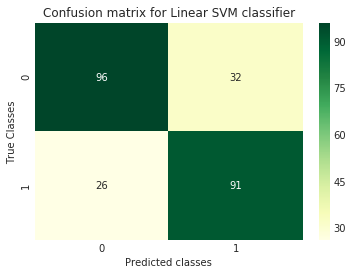

In [22]:
print('test accuracy for Linear SVM classifier:'\
      , round(accuracy_score(df_2011_real, df_2011_Pred)*100, 2), '%')
plt.title('Confusion matrix for Linear SVM classifier')
sns.heatmap(confusion_matrix(df_2011_real, df_2011_Pred), annot=True, cmap="YlGn")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

test accuracy for Linear SVM classifier: 74.69 %


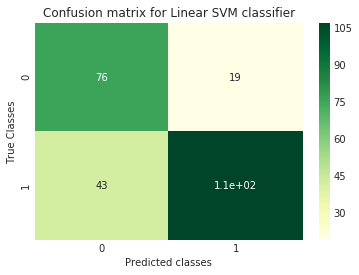

In [23]:
print('test accuracy for Linear SVM classifier:'\
      , round(accuracy_score(df_2015_real, df_2015_Pred)*100, 2), '%')
plt.title('Confusion matrix for Linear SVM classifier')
sns.heatmap(confusion_matrix(df_2015_real, df_2015_Pred), annot=True, cmap="YlGn")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

## Resulta Interesante hacer un classification report con los resultados, ademas del accuracy a veces hay que analizar el recall (que en este caso no cambia mucho), siendo un dato interesante lo que podemos ver con los datos del 2015, donde la precision con los municipios participativos ronda el 85% en contra del 64% del los municipios participativos. Es un dato interesante por ejemplo si quisiesemos invertir en fomentar el voto... iriamos con mas tranquilidad a esos municipios.

In [24]:
print(classification_report(df_2011_real, df_2011_Pred))

             precision    recall  f1-score   support

          1       0.79      0.75      0.77       128
          2       0.74      0.78      0.76       117

avg / total       0.76      0.76      0.76       245



In [25]:
print(classification_report(df_2015_real, df_2015_Pred))

             precision    recall  f1-score   support

          1       0.64      0.80      0.71        95
          2       0.85      0.71      0.78       150

avg / total       0.77      0.75      0.75       245



## He querido poner los datos del confusion matrix con el modelo de una regresion logistica, porque aunque con los datos de train funcionaba muy bien, en cambio cuando lo llevamos a los datos de test, todo se viene abajo

In [28]:
Predict_2011_v2 = clf_loaded_log_reg.predict(Predictors_2009)
df_2011_Pred_v2 = pd.DataFrame(Predict_2011_v2)

test accuracy for Logistic Regression classifier: 47.35 %


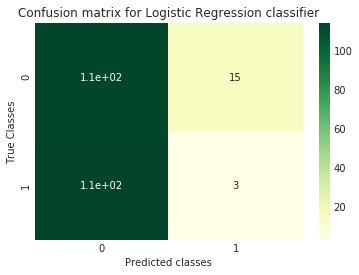

In [29]:
print('test accuracy for Logistic Regression classifier:'\
      , round(accuracy_score(df_2011_real, df_2011_Pred_v2)*100, 2), '%')
plt.title('Confusion matrix for Logistic Regression classifier')
sns.heatmap(confusion_matrix(df_2011_real, df_2011_Pred_v2), annot=True, cmap="YlGn")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

## Para visualizar los datos con Plotly, tengo que montar dataframes con coordenadas de los 245 municipios vascos

In [30]:
lat = [43.1526506,43.047842,43.3169917, 43.2038168, 43.236547,43.2557918, 43.3095149, 43.1294954, 43.1004352,
      42.8424145, 43.1725845, 43.2460224, 43.0645573, 43.1004025, 43.0489646, 43.2164193, 43.3267938,
      43.0525066, 43.2183341, 43.1620711, 43.0991881, 43.152773, 43.0634673, 43.0352061, 42.9791292,
      43.1214494, 43.0359732, 42.722587, 42.7402633, 43.1771192, 43.0656783, 43.3189596,  42.888113,
      43.3416679, 43.2065921, 43.1334436, 43.2514342, 43.1290166, 42.8861126, 43.1928306, 43.2815684, 
      42.9776634, 43.1302284, 43.296423, 43.0761006, 43.1838618, 42.8112546, 43.4284384, 43.0694191,
      43.195853, 43.29548, 43.4066267, 42.9150153, 43.2341364, 42.5295829, 43.0473269, 43.2084398,
      43.1340799, 43.1350267, 43.3628719, 42.682852, 43.1241497, 43.1175442, 43.4194242, 42.6267187,
      43.3089442, 43.1690476, 43.1455807, 43.1406008, 43.2630051, 43.3823418, 42.6866489, 42.9816718,
      43.2916949, 43.1430694, 43.3224219, 43.1707065, 43.3804335, 43.1842839, 43.4031717, 42.8495927,
      42.5153808, 43.1406884, 43.1367656, 43.2143558, 43.1304644, 42.5690308, 43.3055981, 43.3558315,
      43.1862849, 43.3125271, 43.1647321, 42.8198161, 43.3185225, 43.0168367, 43.2474168, 43.2542252,
      43.3329632, 43.3279874, 43.0502538, 43.0530503, 43.2332639, 43.2541103, 43.3101943, 43.1936552, 
      43.3629994, 43.3680455, 43.1164447 , 43.3143628, 43.3044559, 43.3479409, 43.3309436, 43.1798646,
      43.4139073, 43.2104511, 42.7567197, 43.2661645, 43.1544948, 43.3624498, 43.1316471, 43.3896126,
      43.0106787, 43.1642445, 43.0945249, 43.3383176, 43.1675342, 42.8309221, 42.8246442, 43.3565296,
      43.0678266, 43.1763178, 43.1541734, 43.2388933, 43.3408832, 42.5919931, 42.8863726, 42.5903817,
      42.6255515, 42.5627681, 43.2184716, 42.7478259, 42.4934805, 43.2612471, 43.1879341, 43.2684642,
      43.1430692, 43.3521341, 43.0334542, 43.1246812, 43.051235, 43.0848925, 42.9791587, 42.9868906, 
      43.3271048, 43.3637081, 43.2098775, 43.4120254, 42.5655553, 43.2743248, 43.3212392, 43.1033934,
      43.3147645, 43.1895207, 43.2675586, 43.38018, 43.1383492, 43.2525004, 43.2811957, 43.3465692,
      43.3627405, 42.5271966, 43.3000301, 43.407824, 43.3540663, 43.2658092, 43.3514766, 43.3230375,
      43.0220391, 43.3071181, 43.2896199, 43.3215488, 42.5451885, 43.2984861, 43.1547427, 43.0269276,
      43.3207293, 43.0539687, 43.0794987, 43.0942358, 43.2760488, 43.0431256, 43.1065632, 43.3105667,
      43.0408347, 42.506553, 43.0328523, 42.6441334, 43.4051753, 43.3191292, 42.7255641, 42.8492823,
      42.5682299, 42.8798717, 43.3287527, 43.009086, 43.309341, 43.2990664, 43.3802735, 43.2768146,  
      43.1743014, 43.394207, 43.1386097, 43.2835564, 43.0241516, 43.1803743, 43.3730856, 42.994926, 
      42.9709057, 43.24687, 43.0920435, 43.2703088, 42.84777, 43.3047516, 43.1807608, 42.5470187,
      42.5678349, 43.1689923,43.0382572, 42.88569, 42.6616812, 43.2827605, 43.211818, 43.2834873, 43.0984018,
      43.1476164, 42.9758091, 43.0125385, 43.2401376, 43.3518319, 42.9683591, 43.249783, 43.1992503, 42.9817245,
      43.296653, 43.086979]

long = [-2.6079995,-2.1052186,-3.0742539, -2.050099, -2.1486667,-2.2362989, -2.6615317, -2.1374208, -2.0983582,
       -2.512674, -2.1089901,-2.9890455, -2.1543131, -2.0842078, -2.0878104, -2.7358695, -2.5132747, 
       -3.000896, -2.019888, -2.0712454, -2.3819341, -2.9349498, -2.1655819, -2.5857615, -2.3990537,
       -2.7694128, -2.5036785, -2.8722115, -2.4475475, -2.934703, -2.4900779, -2.6452172, -2.5922529, 
       -2.7693167, -2.8873537, -2.7843203, -3.2204577, -3.1414573, -2.2851266, -2.0953614, -1.9474769,
       -2.1813897, -2.5856042, -2.5628139, -3.0790183, -2.2657422, -2.9905109, -2.8090387, -2.1283913,
       -3.1966111, -2.9900933, -2.9609879, -2.5028591, -2.891012, -2.6789897, -2.2032868, -2.8019783,
       -2.2005399, -2.0503391, -2.9957746, -2.8589445, -1.9791586, -2.4133452, -2.7231562,  -2.4980928,
       -2.4681645, -2.57392, -2.0266424, -2.160723, -2.9349915, -2.6982634, -2.3699285, -2.5664127,
       -2.8858821, -2.7508974, -1.9838889, -2.6334897, -2.5848533, -2.4732748, -2.6395034, -2.5448025,
       -2.6181739, -2.0006998, -2.4874683, -2.4168588, -2.5426453, -2.5447226, -2.9729697, -2.6228516,
       -2.5027614, -1.8986133, -2.1743978, -2.9379708, -2.7247594, -2.5283464, -2.8897724, -2.4765923,
       -2.6761163, -2.7847278, -2.2791464, -2.1331865, -2.8453385, -3.097637, -2.809322, -2.6114951,
       -2.8737742, -2.6522978, -2.0228291, -2.6778511, -2.2037374, -3.0087671, -2.5379481, -3.0739299,
       -2.9351774, -3.0945498, -2.32071, -1.9749167, -2.085194, -1.7914288, -2.0622574, -2.6311482,
       -2.2336128, -2.7783435, -2.1242678, -1.7888095, -2.0672224, -2.4296269, -2.8206006, -2.5531077,
       -2.1672356, -2.6338582, -2.6399183, -3.3577112, -2.6554179, -2.5153878, -2.9401423, -2.7928698,
       -2.5836433, -2.5126326, -3.4391344, -2.9942274, -2.5755974, -2.7959022, -2.1023955, -2.0193784,
       -2.9624876, -2.9073702, -2.1861651, -2.052317, -2.3344403, -2.1486222, -2.6426345, -2.5687408,
       -2.9846079, -2.5059965, -2.7788097, -2.9026473, -2.6342866, -2.8329246, -1.8996138, -2.034474,
       -2.9388878, -2.5298369, -2.4974864, -2.866926, -2.6608199, -2.3858392, -2.6437276, -2.4867026,
       -2.8023477, -2.4163449, -2.752374, -2.6992833, -2.8464157, -2.5926035, -2.6811763, -3.1243029,
       -2.2727507, -2.3871098, -2.6891984, -2.5844368, -2.624741, -1.8596587, -3.0267479, -2.2036619,
       -2.4207497, -2.1795046, -2.1141376, -2.0113193, -2.127262, -2.254814, -2.9121005, -3.0555981,
       -2.6542222, -2.4357886, -2.4137149, -2.7136577, -2.9478553, -3.0199529, -2.9076507, -2.3890592,
       -2.6790583, -2.3909783, -3.0318766, -2.2527923, -3.0074501, -2.9260509, -2.9838326, -3.1586864,
       -2.412928, -2.6970992, -2.0723558, -3.280544, -2.6888828, -2.9016079, -2.9483534, -3.009915,
       -2.9186291, -1.9917045, -2.3170309, -2.0502559, -3.09883, -3.0379311, -2.0346714, -2.665437,
       -2.4704011, -2.5487689, -2.1509538, -2.347318, -2.8789406, -2.8623645, -2.873426, -2.1723467,-2.7494734,
       -2.8481716, -2.29036, -2.2733725, -2.2585203, -3.082039, -2.7289188, -2.5494086, -2.0741092, -2.831737,
       -2.2571182, -2.3199345]

municipio = ['Abadiño', 'Abaltzisketa', 'Abanto y Ciérvana-Abanto Zierbena', 'Aduna', 'Aia', 'Aizarnazabal',
            'Ajangiz', 'Albiztur', 'Alegia', 'Alegría-Dulantzi', 'Alkiza', 'Alonsotegi', 'Altzaga', 'Altzo', 
             'Amezketa', 'Amorebieta-Etxano', 'Amoroto', 'Amurrio', 'Andoain', 'Anoeta', 'Antzuola', 'Arakaldo',
            'Arama', 'Aramaio', 'Arantzazu', 'Areatza', 'Aretxabaleta', 'Armiñón', 'Arraia-Maeztu', 'Arrankudiaga',
            'Arrasate/Mondragón', 'Arratzu', 'Arratzua-Ubarrundia', 'Arrieta', 'Arrigorriaga', 'Artea',
            'Artzentales', 'Artziniega', 'Asparrena', 'Asteasu', 'Astigarraga', 'Ataun', 'Atxondo', 'Aulesti',
            'Ayala/Aiara', 'Azpeitia', 'Añana', 'Bakio', 'Baliarrain', 'Balmaseda', 'Barakaldo', 'Barrika',
            'Barrundia', 'Basauri', 'Baños de Ebro/Mañueta', 'Beasain', 'Bedia', 'Beizama','Belauntza', 
            'Berango', 'Berantevilla', 'Berastegi', 'Bergara', 'Bermeo', 'Bernedo', 'Berriatua', 'Berriz', 
             'Berrobi', 'Bidania-Goiatz', 'Bilbao', 'Busturia', 'Campezo/Kanpezu', 'Deba', 'Derio', 'Dima',
             'Donostia / San Sebastián', 'Durango', 'Ea', 'Eibar', 'Elantxobe', 'Elburgo/Burgelu', 'Elciego',
             'Elduain', 'Elgeta', 'Elgoibar', 'Elorrio', 'Elvillar/Bilar', 'Erandio', 'Ereño', 'Ermua', 'Errenteria',
             'Errezil', 'Erriberagoitia/Ribera Alta', 'Errigoiti', 'Eskoriatza', 'Etxebarri', 'Etxebarria', 'Forua',
             'Fruiz', 'Gabiria', 'Gaintza', 'Galdakao', 'Galdames', 'Gamiz-Fika', 'Garai', 'Gatika', 
             'Gautegiz Arteaga', 'Gaztelu', 'Gernika-Lumo', 'Getaria', 'Getxo', 'Gizaburuaga', 'Gordexola',
             'Gorliz', 'Güeñes', 'Harana/Valle de Arana', 'Hernani', 'Hernialde', 'Hondarribia', 'Ibarra', 
             'Ibarrangelu', 'Idiazabal', 'Igorre', 'Ikaztegieta', 'Irun', 'Irura', 'Iruraiz-Gauna', 
             'Iruña Oka/Iruña de Oca', 'Ispaster', 'Itsasondo', 'Iurreta', 'Izurtza', 
             'Karrantza Harana/Valle de Carranza', 'Kortezubi', 'Kripan', 'Kuartango', 'Labastida/Bastida', 'Lagrán',
             'Lanciego/Lantziego', 'Lanestosa', 'Lantarón', 'Lapuebla de Labarca', 'Larrabetzu', 'Larraul',
             'Lasarte-Oria', 'Laudio/Llodio', 'Laukiz', 'Lazkao', 'Leaburu', 'Legazpi', 'Legorreta', 'Legutio',
             'Leintz-Gatzaga', 'Leioa', 'Lekeitio', 'Lemoa', 'Lemoiz', 'Leza', 'Lezama','Lezo', 'Lizartza', 'Loiu',
             'Mallabia', 'Markina-Xemein', 'Maruri-Jatabe', 'Mañaria', 'Mendaro', 'Mendata', 'Mendexa', 'Meñaka',
            'Moreda de Álava / Moreda Araba', 'Morga', 'Mundaka', 'Mungia', 'Munitibar-Arbatzegi Gerrikaitz-',
             'Murueta', 'Muskiz','Mutiloa', 'Mutriku', 'Muxika', 'Nabarniz', 'Navaridas', 'Oiartzun','Okondo',
             'Olaberria', 'Ondarroa', 'Ordizia','Orendain', 'Orexa', 'Orio', 'Ormaiztegi','Orozko', 'Ortuella',
             'Otxandio','Oyón-Oion','Oñati', 'Peñacerrada-Urizaharra', 'Plentzia', 'Portugalete', 
             'Ribera Baja/Erribera Beitia', 'Salvatierra/Agurain', 'Samaniego', 'San Millán/Donemiliaga','Santurtzi',
            'Segura','Sestao','Sondika','Sopela','Sopuerta','Soraluze-Placencia de las Armas','Sukarrieta','Tolosa',
            'Trucios-Turtzioz','Ubide','Ugao-Miraballes','Urduliz','Urduña/Orduña','Urkabustaiz','Urnieta','Urretxu',
            'Usurbil','Valdegovía/Gaubea','Valle de Trápaga-Trapagaran','Villabona','Villabuena de Álava/Eskuernaga',
            'Yécora/Iekora','Zaldibar','Zaldibia','Zalduondo','Zambrana','Zamudio','Zaratamo','Zarautz','Zeanuri',
             'Zeberio','Zegama','Zerain','Zestoa','Zierbena','Zigoitia','Ziortza-Bolibar','Zizurkil','Zuia','Zumaia',
            'Zumarraga'
             
            ]

df_coordenadas = pd.DataFrame({'Municipio': municipio,'latitud': lat,'longitud':long})


In [31]:
df_coordenadas.to_csv('DF_coordenadas.csv')

In [32]:
df_coordenadas.shape

(245, 3)

In [33]:
df_foto_pred09 = pd.concat([df_coordenadas, df_2011_Pred], axis=1)
df_foto_pred09.columns = ['Municipio','latitud', 'longitud', 'Prediccion']

In [34]:
df_foto_real11 = pd.concat([df_coordenadas, df_2011_real], axis=1)
df_foto_real11.columns = ['Municipio','latitud', 'longitud', 'Real']

In [35]:
df_foto_pred13 = pd.concat([df_coordenadas, df_2015_Pred], axis=1)
df_foto_pred13.columns = ['Municipio','latitud', 'longitud', 'Prediccion']

In [36]:
df_foto_real15 = pd.concat([df_coordenadas, df_2015_real], axis=1)
df_foto_real15.columns = ['Municipio','latitud', 'longitud', 'Real']

In [37]:
df_foto_pred17 = pd.concat([df_coordenadas, df_2019_Pred], axis=1)
df_foto_pred17.columns = ['Municipio','latitud', 'longitud', 'Prediccion']

In [38]:
df_foto_pred09_si = df_foto_pred09[df_foto_pred09['Prediccion'] == 1]
df_foto_pred09_no = df_foto_pred09[df_foto_pred09['Prediccion'] == 2]

In [39]:
df_foto_real11_si = df_foto_real11[df_foto_real11['Real'] == 1]
df_foto_real11_no = df_foto_real11[df_foto_real11['Real'] == 2]

In [40]:
df_foto_pred13_si = df_foto_pred13[df_foto_pred13['Prediccion'] == 1]
df_foto_pred13_no = df_foto_pred13[df_foto_pred13['Prediccion'] == 2]

In [41]:
df_foto_real15_si = df_foto_real15[df_foto_real15['Real'] == 1]
df_foto_real15_no = df_foto_real15[df_foto_real15['Real'] == 2]

In [42]:
df_foto_pred17_si = df_foto_pred17[df_foto_pred17['Prediccion'] == 1]
df_foto_pred17_no = df_foto_pred17[df_foto_pred17['Prediccion'] == 2]

In [43]:
df_foto_pred09_si.to_csv('df_foto_pred09_si.csv')
df_foto_pred09_no.to_csv('df_foto_pred09_no.csv')
df_foto_real11_si.to_csv('df_foto_real11_si.csv')
df_foto_real11_no.to_csv('df_foto_real11_no.csv')
df_foto_pred13_si.to_csv('df_foto_pred13_si.csv')
df_foto_pred13_no.to_csv('df_foto_pred13_no.csv')
df_foto_real15_si.to_csv('df_foto_real15_si.csv')
df_foto_real15_no.to_csv('df_foto_real15_no.csv')
df_foto_pred17_si.to_csv('df_foto_pred17_si.csv')
df_foto_pred17_no.to_csv('df_foto_pred17_no.csv')

## Voy a crear un CSV con el Dataframe de la prediccion para 2019 para luego poder utilizarlo cuando quiera añadir las predicciones de participacion de los 245 municipios con regresiones.

In [44]:
df_foto_pred17.to_csv('df_foto_pred17.csv')